# PCA

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## iris 数据集上的PCA降维

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
pipeline = Pipeline(steps=[('standard', StandardScaler()), ('decomposition', PCA(n_components=2))])

In [7]:
data_new = pipeline.fit_transform(X)

In [8]:
data_new[-5:]

array([[ 1.87050329,  0.38696608],
       [ 1.56458048, -0.89668681],
       [ 1.5211705 ,  0.26906914],
       [ 1.37278779,  1.01125442],
       [ 0.96065603, -0.02433167]])

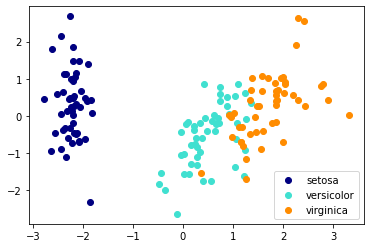

In [9]:
colors = ['navy', 'turquoise', 'darkorange']
for color , i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(data_new[y==i, 0], data_new[y==i, 1], color=color, label=target_name)
plt.legend()
plt.show()

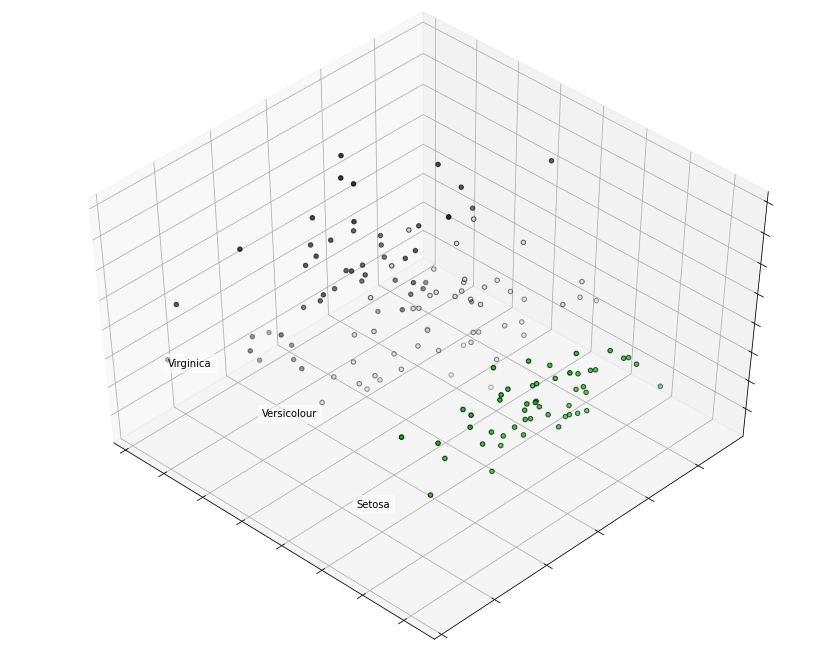

In [10]:
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
                X[y == label, 1].mean() + 1.5,
                X[y == label, 2].mean(), name,
                horizontalalignment='center',
                bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
            edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

---
## 手写数字

In [11]:
from sklearn.datasets import load_digits

In [12]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [21]:
digits.data.shape

(1797, 64)

In [13]:
# 打印图片信息
def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                       hspace=0.05, wspace=0.005)
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i += 1

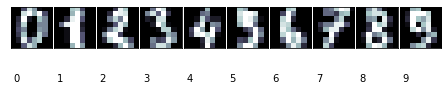

In [14]:
print_digits(digits.images, digits.target)

In [15]:
pca = PCA()  # 64维降到2维
X_pca = pca.fit_transform(digits.data)

In [20]:
X_pca.shape

(1797, 64)

In [16]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [17]:
# 第一、二主成分 在特征空间的表示
pca.components_.shape

(64, 64)

In [18]:
# 10 个数字10种颜色, 不同类别是否明显可分 
def plot_pca_scatter(X_pca):
    plt.figure(figsize=(12, 10))
    colors = ['black', 'blue', 'purple', 'yellow', 'green',
              'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(10):
        plt.scatter(X_pca[digits.target==i, 0], X_pca[digits.target==i, 1],
                    color=colors[i], edgecolors='k')
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Compoent')

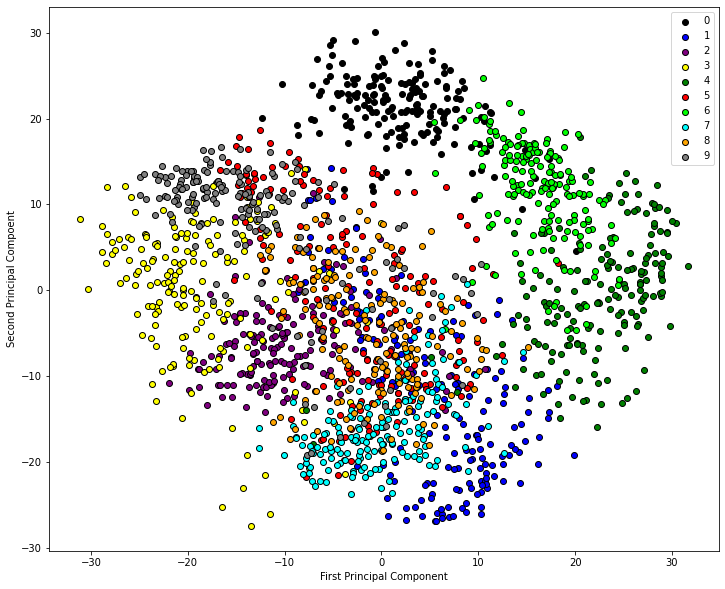

In [19]:
plot_pca_scatter(X_pca)

分析结果:
- 对于大多数类，它们的实例根据其目标类清楚地分组，并且簇相对不同。例外是对应于数字 5 的类，其中实例非常稀疏地分布在平面上与其他类重叠
- 在另一个极端，对应于数字 0 的类是最可分离的簇。直观地说，这个类可能是最容易与其他类分开的类；也就是说，如果我们训练一个分类器，它应该是具有最佳评估数字的类。
- 此外，对于拓扑分布，我们可以预测相邻类对应于相似的数字，这意味着它们将是最难分离的。例如，对应于数字 9 和 3 的簇看起来是相邻的（由于它们的图形表示是相似的，因此可以预计），因此，从 3 分离 9 可能比从 3 分离 4 更难，它位于左侧，远离这些簇

In [22]:
def print_pca_components(images, n_cols, n_rows):
    plt.figure(figsize=(2 * n_cols, 2.26 * n_rows))
    for i, comp in enumerate(images):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(comp.reshape(8, 8), interpolation='nearest')
        plt.text(0, -1, str(i+1) + '-component')
        plt.xticks()
        plt.yticks()

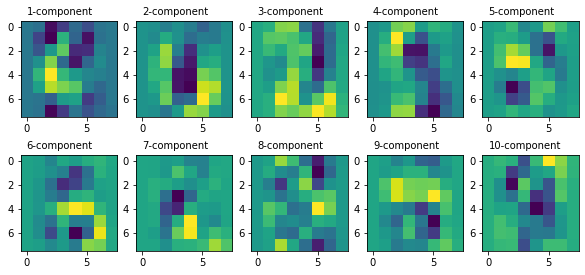

In [23]:
print_pca_components(pca.components_[:10], 5, 2)

通过查看上图中的前两个成分，我们可以得出一些有趣的观察结果：

- 如果查看第二个成分，可以看到它主要突出显示图像的中心区域。受此模式影响最大的digit类是 0，因为其中心区域为空。通过查看我们之前的散点图来证实这种直觉。如果查看对应于数字 0 的簇，您可以看到它是第二个成分具有较低值的簇。
- 关于第一个成分，正如我们在散点图中看到的那样，可用于分离对应于数字 4（极右，高值）和 3 （极左，低值）数字的簇。如果你看到第一个成分图，它证实了这个观察结果。您可以看到区域非常相似于数字 3 ，而在数字 4 的特征区域中，它也拥有颜色。

# 增量PCA(Incremental PCA)

PCA 对象非常有用, 但 针对大型数据集的应用, 仍然具有一定的限制。 最大的限制是 PCA 仅支持批处理，这意味着所有要处理的数据必须放在主内存。 IncrementalPCA 对象使用不同的处理形式, 即允许部分计算以小型批处理方式处理数据的方法进行, 而得到和 PCA 算法差不多的结果。 IncrementalPCA 可以通过以下方式实现核外（out-of-core）主成分分析：

- 基于从本地硬盘或网络数据库中连续获取的数据块之上, 使用 partial_fit 方法。
- 在 memory mapped file (通过 numpy.memmap 创建)上使用 fit 方法。

IncrementalPCA 类为了增量式的更新 explained_variance_ratio_ ，仅需要存储估计出的分量和噪声方差。 这就是为什么内存使用量依赖于每个批次的样本数量，而不是数据集中需要处理的样本总量。

Automatically created module for IPython interactive environment


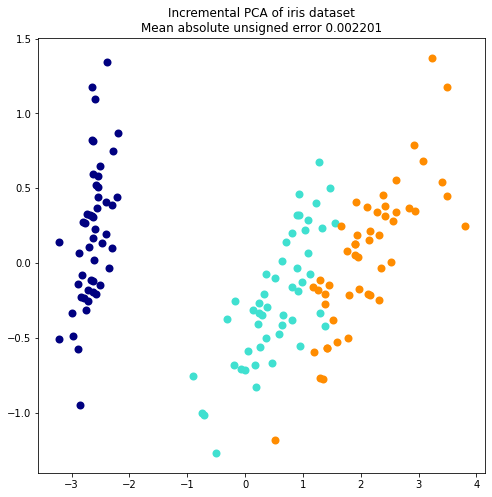

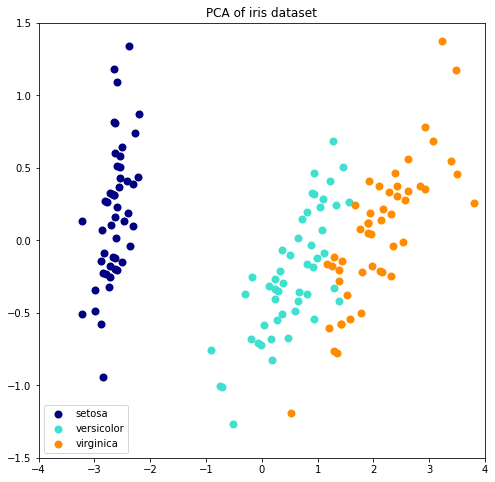

In [24]:
print(__doc__)
# Authors: Kyle Kastner
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
        if "Incremental" in title:
            err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
            plt.title(title + " of iris dataset\nMean absolute unsigned error "
            "%.6f" % err)
        else:
            plt.title(title + " of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])
plt.show()

## 基于随机化SVD的PCA
通过丢弃具有较低奇异值的奇异向量的分量，将数据降维到低维空间并保留大部分方差信息是非常有意义的。

例如，如果我们使用64x64像素的灰度级图像进行人脸识别，数据的维数为4096，在这样大的数据上训练含RBF内核的支持向量机是很慢的。此外我们知道这些数据固有维度远低于4096，因为人脸的所有照片都看起来有点相似。样本位于较低维度的流体上（例如约200维）。 PCA算法可以用于线性变换数据，同时降低维数并同时保留大部分可描述的方差信息。

在这种情况下，使用可选参数 svd_solver='randomized' 的 PCA 是非常有用的。既然我们将要丢弃大部分奇异值，那么仅仅就实际转换中所需的奇异向量进行计算就可以使得 PCA 计算过程变得异常有效

---
**Faces dataset decompositions**

Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.583s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.027s
Fitting the classifier to the training set
done in 38.143s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in 0.063s
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.95      0.67      0.78        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85 

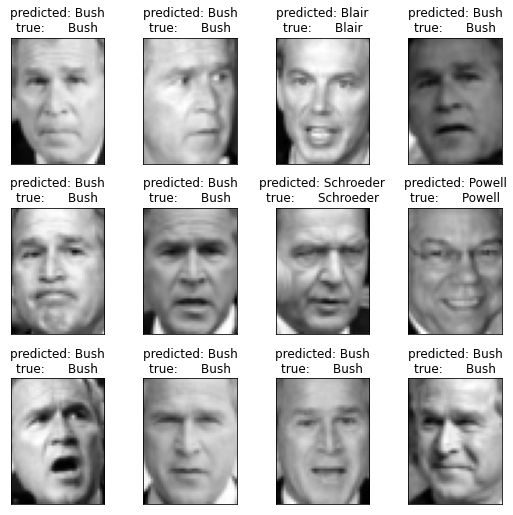

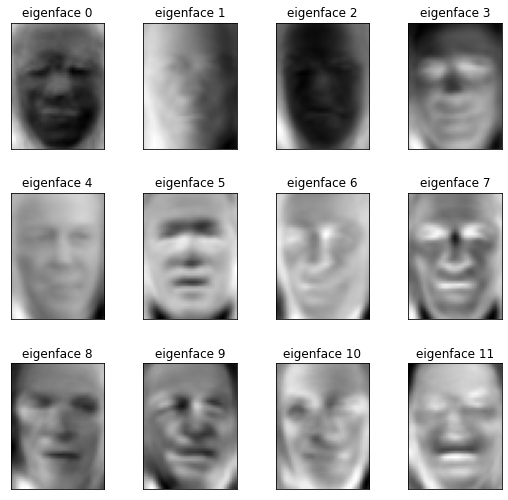

In [26]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150  # 从64* 64 降维

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Kernel PCA
KernelPCA 是 PCA 的扩展，通过使用核方法实现`非线性降维`（dimensionality reduction） (参阅 成对的矩阵, 类别和核函数)。 它具有许多应用，包括去噪, 压缩和结构化预测（ structured prediction ） (kernel dependency estimation（内核依赖估计）)。 KernelPCA 支持 transform 和 inverse_transform 。

Automatically created module for IPython interactive environment


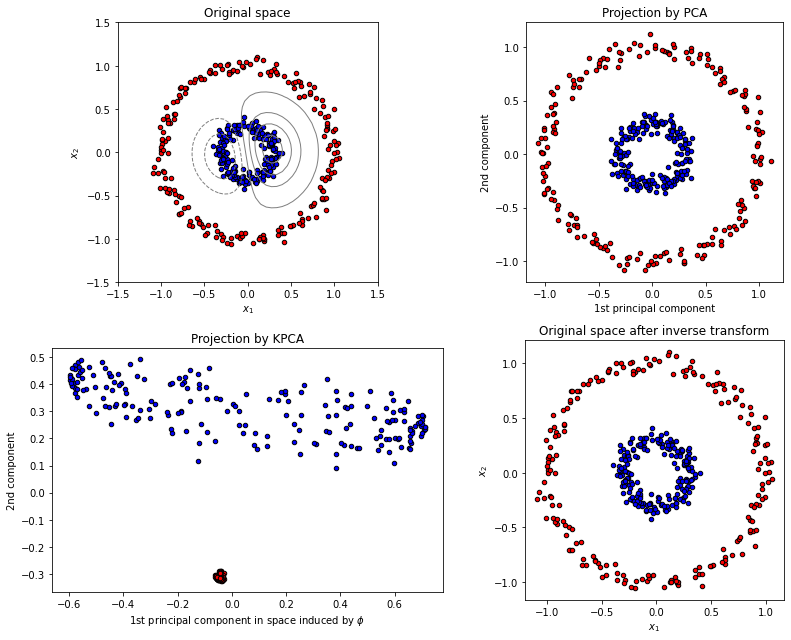

In [27]:
print(__doc__)
# Authors: Mathieu Blondel
# Andreas Mueller
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# y = \phi(x) 高斯核 不再是线性变换
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

# 降维后的数据重新变换回来
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1, aspect='equal')

plt.title("Original space")
reds = y == 0  # 外圆
blues = y == 1  # 内圆
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.show()